In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
import pathlib

# Path ke direktori dataset di Google Drive
dataset_url = '/content/drive/MyDrive/MATERI/Dataset/Data_Train'

# Membuat objek Path untuk direktori dataset
data_dir = pathlib.Path(dataset_url)

In [31]:
sekar_kemuning = list(data_dir.glob('sekar_kemuning/*'))

image_count = len(list(data_dir.glob('sekar_kemuning/*.jpg')))
print(f"Jumlah data foto: {image_count}")

Jumlah data foto: 15


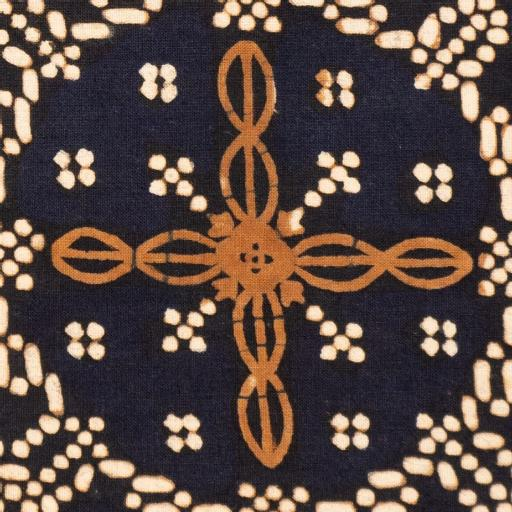

In [33]:
PIL.Image.open (str (sekar_kemuning [1]))

In [34]:
sekar_liring = list(data_dir.glob('sekar_liring/*'))

image_count = len(list(data_dir.glob('sekar_liring/*.jpg')))
print(f"Jumlah data foto: {image_count}")

Jumlah data foto: 15


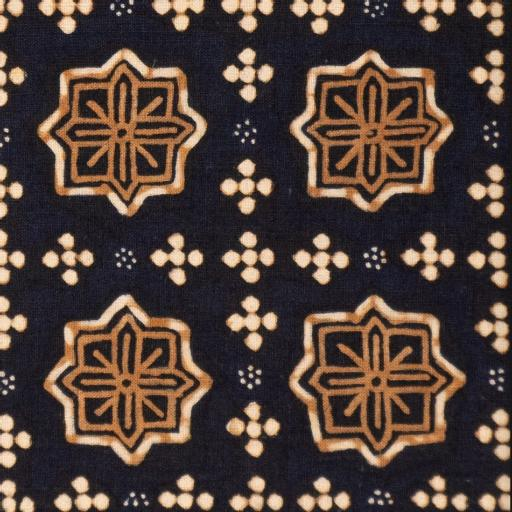

In [35]:
PIL.Image.open (str (sekar_liring [1]))

In [38]:
sekar_duren = list(data_dir.glob('sekar_duren/*'))

image_count = len(list(data_dir.glob('sekar_duren/*.jpg')))
print(f"Jumlah data foto: {image_count}")

Jumlah data foto: 15


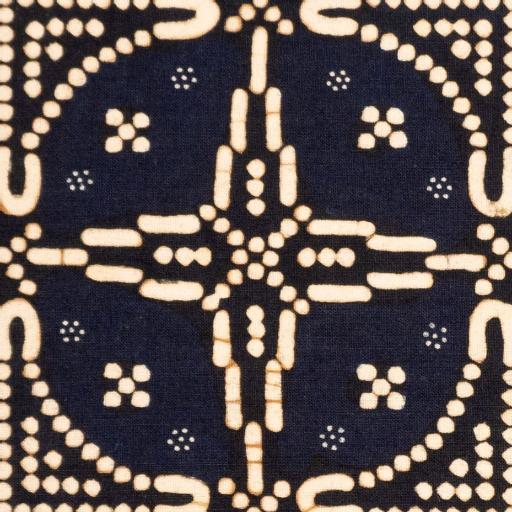

In [39]:
PIL.Image.open (str (sekar_duren [1]))

In [40]:
sekar_gayam = list(data_dir.glob('sekar_gayam/*'))

image_count = len(list(data_dir.glob('sekar_gayam/*.jpg')))
print(f"Jumlah data foto: {image_count}")

Jumlah data foto: 15


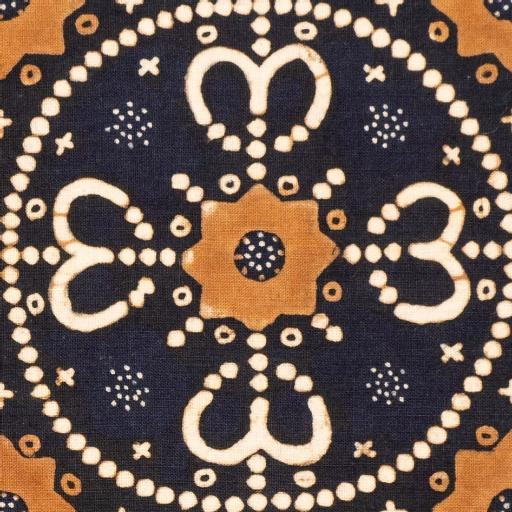

In [41]:
PIL.Image.open (str (sekar_gayam [1]))

In [42]:
sekar_pacar = list(data_dir.glob('sekar_pacar/*'))

image_count = len(list(data_dir.glob('sekar_pacar/*.jpg')))
print(f"Jumlah data foto: {image_count}")

Jumlah data foto: 15


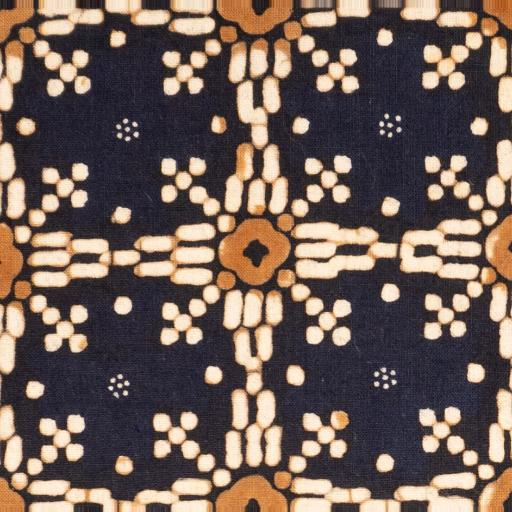

In [44]:
PIL.Image.open (str (sekar_pacar [1]))

In [45]:
batch_size = 64
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 75 files belonging to 5 classes.
Using 60 files for training.


In [46]:
val_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 75 files belonging to 5 classes.
Using 15 files for validation.


In [47]:
class_names = train_ds.class_names
print(class_names)

['sekar_duren', 'sekar_gayam', 'sekar_kemuning', 'sekar_liring', 'sekar_pacar']


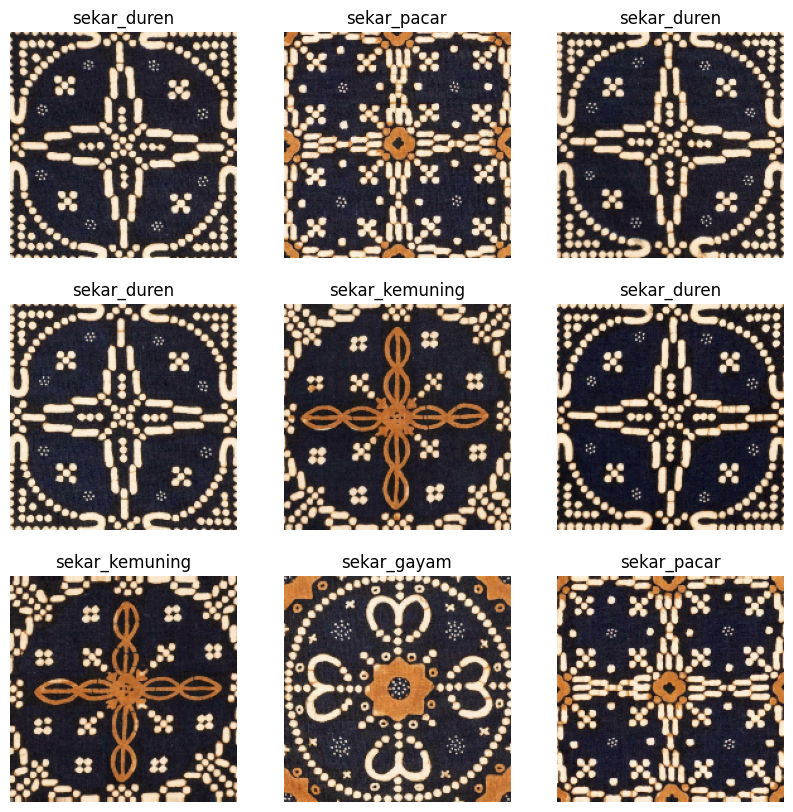

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [49]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(60, 180, 180, 3)
(60,)


In [50]:
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, dan prefetch untuk train_ds
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Cache dan prefetch untuk val_ds
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [51]:
normalization_layer = layers. Rescaling(1./255)

In [52]:
# Normalisasi dataset train_ds
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Ambil satu batch gambar dari normalized_ds
image_batch, labels_batch = next(iter(normalized_ds))

# Ambil gambar pertama dari batch
first_image = image_batch[0]

# Cetak nilai piksel minimum dan maksimum dari gambar pertama
print(np.min(first_image), np.max(first_image))

0.0009218101 0.99964917


In [53]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # Layer Conv2D baru
    layers.MaxPooling2D(),  # Layer MaxPooling2D baru
    layers.Flatten(),  # Layer Flatten
    layers.Dense(128, activation='relu'),  # Layer Dense dengan 128 neuron dan aktivasi relu
    layers.Dense(num_classes)  # Layer Dense output dengan jumlah neuron sesuai dengan num_classes
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
# Membangun model
model.build(input_shape=(None, img_height, img_width, 3))

# Melihat ringkasan dari model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 rescaling_1 (Rescaling)     (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [56]:
epochs = 200
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 1.6359 - accuracy: 0.0500 - val_loss: 1.9181 - val_accuracy: 0.2667
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 1.4644 - accuracy: 0.4333 - val_loss: 1.2228 - val_accuracy: 0.4667
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 1.0355 - accuracy: 0.6333 - val_loss: 0.7832 - val_accuracy: 0.8000
Epoch 4/200
1/1 [==============================] - 3s 3s/step - loss: 0.6736 - accuracy: 0.8000 - val_loss: 0.4116 - val_accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 0.3216 - accuracy: 1.0000 - val_loss: 0.2079 - val_accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 0.1366 - accuracy: 1.0000 - val_loss: 0.0881 - val_accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 8/200
1/1 [=================

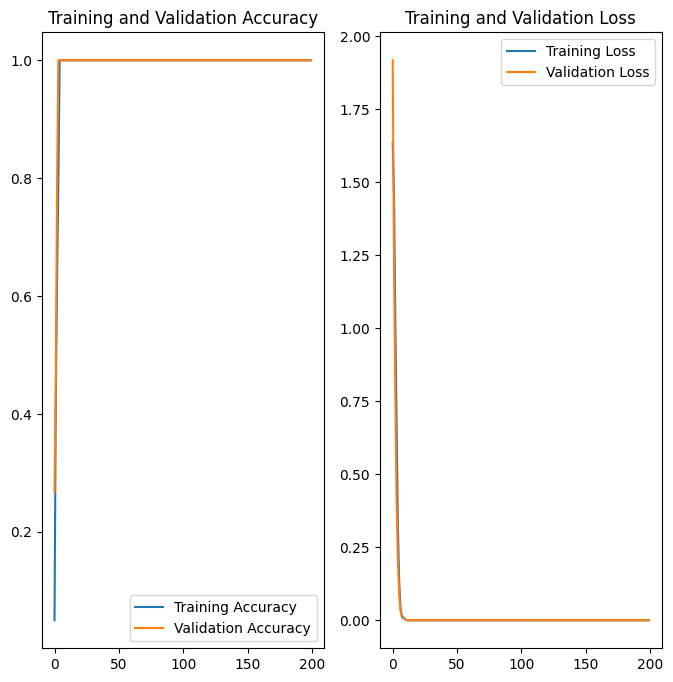

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

1/1 [==============================] - 0s 56ms/step
Gambar ini merupakan sekar_gayam dengan tingkat kepercayaan 100.00 persen.


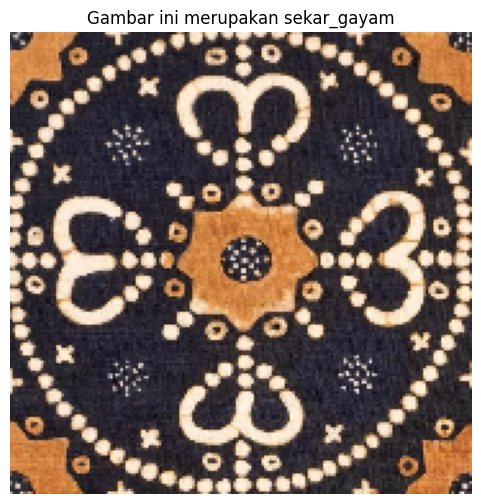

In [61]:
sunflower_path = '/content/drive/MyDrive/MATERI/Dataset/Data_Testing/4 Sekar Gayam 1.jpg'

# Load gambar dan resize sesuai dengan ukuran yang dibutuhkan oleh model
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)

# Konversi gambar menjadi array numpy
img_array = tf.keras.utils.img_to_array(img)

# Tambahkan dimensi batch
img_array = tf.expand_dims(img_array, 0)

# Lakukan prediksi menggunakan model
predictions = model.predict(img_array)

# Konversi prediksi menjadi probabilitas menggunakan softmax
score = tf.nn.softmax(predictions[0])

# Cetak hasil prediksi
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(
    "Gambar ini merupakan {} dengan tingkat kepercayaan {:.2f} persen."
    .format(predicted_class, confidence)
)

# Tampilkan gambar dengan hasil prediksi
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Gambar ini merupakan {predicted_class}")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 50ms/step
Gambar ini merupakan sekar_liring dengan tingkat kepercayaan 100.00 persen.


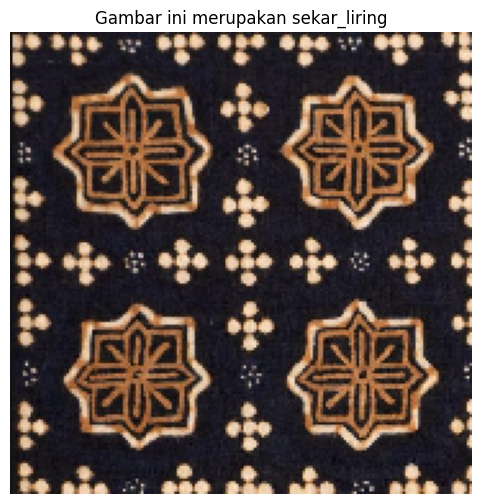

In [62]:
sunflower_path = '/content/drive/MyDrive/MATERI/Dataset/Data_Testing/2 Sekar Liring 1.jpg'

# Load gambar dan resize sesuai dengan ukuran yang dibutuhkan oleh model
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)

# Konversi gambar menjadi array numpy
img_array = tf.keras.utils.img_to_array(img)

# Tambahkan dimensi batch
img_array = tf.expand_dims(img_array, 0)

# Lakukan prediksi menggunakan model
predictions = model.predict(img_array)

# Konversi prediksi menjadi probabilitas menggunakan softmax
score = tf.nn.softmax(predictions[0])

# Cetak hasil prediksi
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(
    "Gambar ini merupakan {} dengan tingkat kepercayaan {:.2f} persen."
    .format(predicted_class, confidence)
)

# Tampilkan gambar dengan hasil prediksi
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Gambar ini merupakan {predicted_class}")
plt.axis("off")
plt.show()

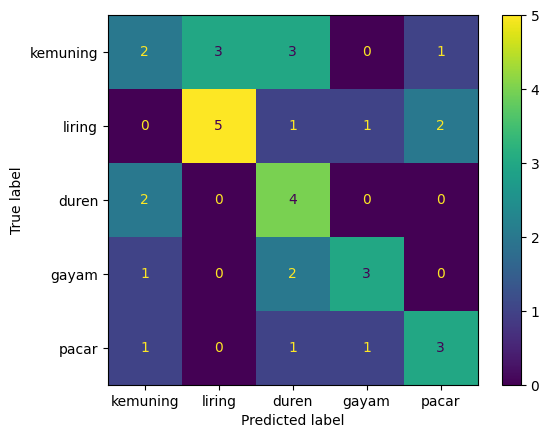

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Contoh label sebenarnya (y_true) dan prediksi (y_pred) dengan kategori
y_true = ["sekar_kemuning", "sekar_liring", "sekar_duren", "sekar_gayam", "sekar_pacar", "sekar_gayam",
          "sekar_duren", "sekar_gayam", "sekar_pacar", "sekar_kemuning", "sekar_liring", "sekar_kemuning",
          "sekar_liring", "sekar_duren", "sekar_kemuning", "sekar_gayam", "sekar_liring", "sekar_pacar",
          "sekar_duren", "sekar_gayam", "sekar_liring", "sekar_pacar", "sekar_kemuning", "sekar_liring",
          "sekar_duren", "sekar_gayam", "sekar_pacar", "sekar_kemuning", "sekar_liring", "sekar_kemuning",
          "sekar_kemuning", "sekar_liring", "sekar_kemuning", "sekar_duren", "sekar_liring", "sekar_pacar"]
y_pred = ["sekar_liring", "sekar_liring", "sekar_duren", "sekar_duren", "sekar_duren", "sekar_duren",
          "sekar_kemuning", "sekar_kemuning", "sekar_kemuning", "sekar_liring", "sekar_pacar", "sekar_liring",
          "sekar_duren", "sekar_kemuning", "sekar_kemuning", "sekar_gayam", "sekar_liring", "sekar_pacar",
          "sekar_duren", "sekar_gayam", "sekar_gayam", "sekar_gayam", "sekar_duren", "sekar_pacar",
          "sekar_duren", "sekar_gayam", "sekar_pacar", "sekar_kemuning", "sekar_liring", "sekar_pacar",
          "sekar_duren", "sekar_liring", "sekar_duren", "sekar_duren", "sekar_liring", "sekar_pacar"]

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["sekar_kemuning", "sekar_liring", "sekar_duren", "sekar_gayam", "sekar_pacar"])

# Menampilkan confusion matrix dengan Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["kemuning", "liring", "duren", "gayam", "pacar"])
disp.plot()

# Menampilkan plot
plt.show()

In [69]:
predictions = np.argmax(model.predict(val_ds), axis=-1)

true_labels = []
for _, labels in val_ds:
  true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

1/1 [==============================] - 0s 126ms/step


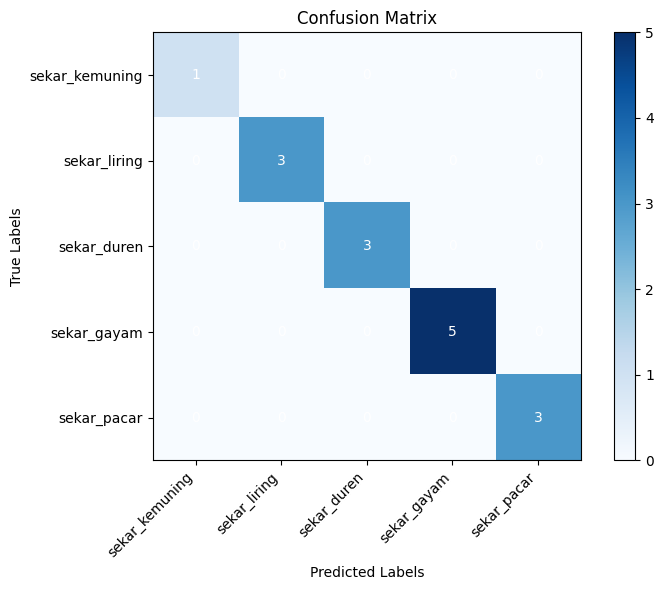

Accuracy: 1.0


In [70]:
conf_matrix = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

class_names = ('sekar_kemuning', 'sekar_liring', 'sekar_duren', 'sekar_gayam', 'sekar_pacar')

plt.xticks(np.arange(num_classes), class_names, rotation=45, ha='right')
plt.yticks(np.arange(num_classes), class_names)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.tight_layout()
plt.show()

accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f'Accuracy: {accuracy}')

In [71]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, f1_score
# Generate predictions for validation set
predictions = np.argmax(model.predict(val_ds), axis=-1)

# Flatten true labels
true_labels = []
for _, labels in val_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

# Generate classification report
report = classification_report(true_labels, predictions, target_names=class_names)
print("Classification Report:")
print(report)

# Calculate F1 score
f1 = f1_score(true_labels, predictions, average='weighted')
print(f"F1 Score: {f1}")

1/1 [==============================] - 0s 207ms/step
Classification Report:
                precision    recall  f1-score   support

sekar_kemuning       1.00      1.00      1.00         1
  sekar_liring       1.00      1.00      1.00         3
   sekar_duren       1.00      1.00      1.00         3
   sekar_gayam       1.00      1.00      1.00         5
   sekar_pacar       1.00      1.00      1.00         3

      accuracy                           1.00        15
     macro avg       1.00      1.00      1.00        15
  weighted avg       1.00      1.00      1.00        15

F1 Score: 1.0
